# Libraries & GDrive

In [1]:
folder_nb = 0

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [34]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

The folder which will read spectrum files.

In [35]:
parent_dir = "/gdrive/My Drive/YL TEZ/py/swan_models/new_models"

In [36]:
os.chdir(parent_dir)

In [37]:
#folder_nb = 7

In [38]:
mdate = os.listdir()[folder_nb]
if mdate == "Spectrums" or mdate == "Profiles_Excel":
  folder_nb += 1
else:
  date = mdate[6:]

In [39]:
date

'09260100'

In [40]:
os.chdir("/gdrive/My Drive/YL TEZ/py/swan_models/new_models/Spectrums")

In [41]:
file_name = date + "_Fit_Data.xlsx"

In [42]:
file_name

'09260100_Fit_Data.xlsx'

# Determine boundary sensor

In [43]:
spec_file = pd.ExcelFile(file_name)

In [44]:
p87 = date + ".ppp87"
p19 = date + ".ppp19"
p18 = date + ".ppp18"
p45 = date + ".ppp45"
p17 = date + ".ppp17"
p15 = date + ".ppp15"
p16 = date + ".ppp16"
p14 = date + ".ppp14"
p13 = date + ".ppp13"
p12 = date + ".ppp12"
p26 = date + ".ppp26"
p23 = date + ".ppp23"
p05 = date + ".ppp05"
p04 = date + ".ppp04"
p03 = date + ".ppp03"
p02 = date + ".ppp02"
p01 = date + ".ppp01"

In [45]:
if p87 in spec_file.sheet_names:
  sheetname = p87
  boun_loc = "-884.1100"
elif p19 in spec_file.sheet_names:
  sheetname = p19
  boun_loc = "-480.3400"
elif p18 in spec_file.sheet_names:
  sheetname = p18
  boun_loc = "-398.3900"
elif p45 in spec_file.sheet_names:
  sheetname = p45
  boun_loc = "-370.0800"
elif p17 in spec_file.sheet_names:
  sheetname = p17
  boun_loc = "-320.3700"
elif p15 in spec_file.sheet_names:
  sheetname = p15
  boun_loc = "-264.7000"
elif p16 in spec_file.sheet_names:
  sheetname = p16
  boun_loc = "-252.0300"
elif p14 in spec_file.sheet_names:
  sheetname = p14
  boun_loc = "-240.55000"
elif p13 in spec_file.sheet_names:
  sheetname = p13
  boun_loc = "-220.2300"
elif p12 in spec_file.sheet_names:
  sheetname = p12
  boun_loc = "-205.3400"
elif p26 in spec_file.sheet_names:
  sheetname = p26
  boun_loc = "-190.2000"
elif p23 in spec_file.sheet_names:
  sheetname = p23
  boun_loc = "-190.2000"
elif p05 in spec_file.sheet_names:
  sheetname = p05
  boun_loc = "-169.5000"
elif p04 in spec_file.sheet_names:
  sheetname = p04
  boun_loc = "-160.7700"
elif p03 in spec_file.sheet_names:
  sheetname = p03
  boun_loc = "-145.4200"
elif p02 in spec_file.sheet_names:
  sheetname = p02
  boun_loc = "-135.0100"
elif p01 in spec_file.sheet_names:
  sheetname = p01
  boun_loc = "-124.9400"
print("Boundary sensor name:\t \t", sheetname)
print("Boundary sensor location(x):\t", boun_loc)

Boundary sensor name:	 	 09260100.ppp87
Boundary sensor location(x):	 -884.1100


# Read Spectrum Files

In [46]:
boundary_sensor = sheetname

In [47]:
os.mkdir(parent_dir + '/' + 'model_' + date + '/' + 'Results' + '/' + 'SWAN_substaction_from_boundary_sensor')

## Read DATE_model_result.xlsx

In [48]:
os.chdir(parent_dir + '/' + 'model_' + date + '/' + 'Results')

In [49]:
#swan_excel is the SWAN Result Spectrum Excel File
swan_excel = pd.ExcelFile('model_result.xlsx')
swan_excel.sheet_names

['p02',
 'p03',
 'p04',
 'p05',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p23',
 'p45',
 'p19',
 'p87']

In [50]:
path_ = parent_dir + '/' + 'model_' + date + '/' + 'Results/' + 'model_result.xlsx'

In [51]:
!pip install XlsxWriter

In [52]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(parent_dir + '/' + 'model_' + date + '/' + 'Results'+ '/' + 'SWAN_substaction_from_boundary_sensor' + '/' + 'SWAN_' + date + "_substaction_" + boundary_sensor[11:] + ".xlsx", engine='xlsxwriter')

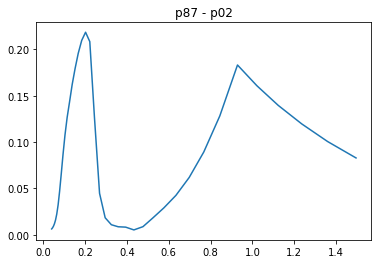

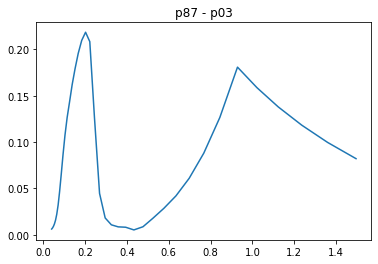

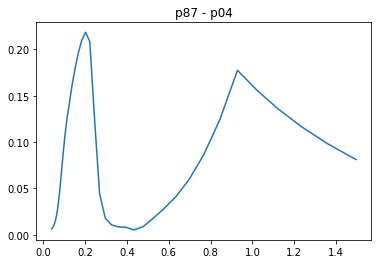

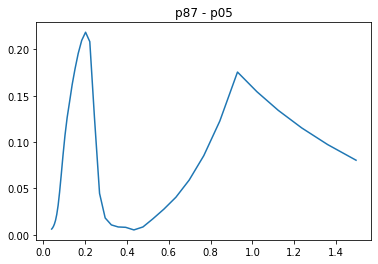

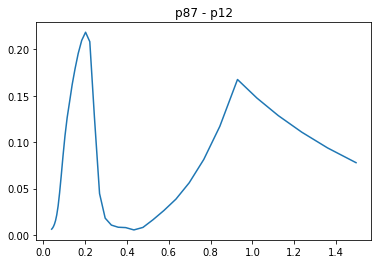

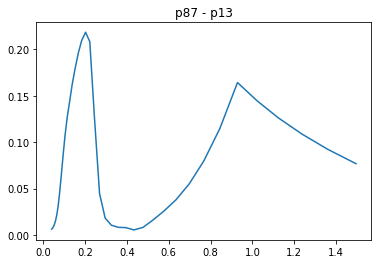

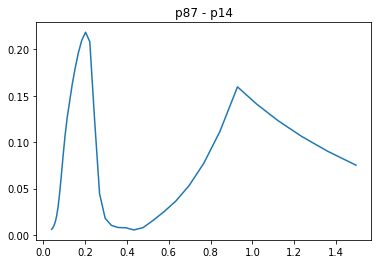

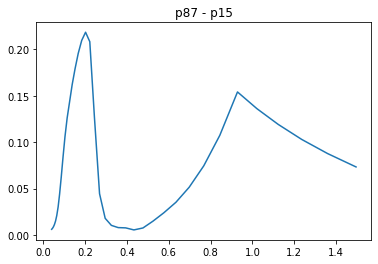

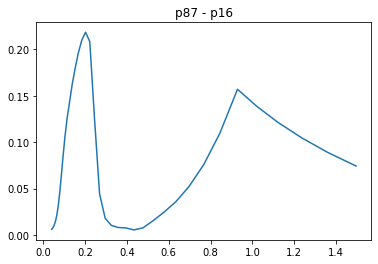

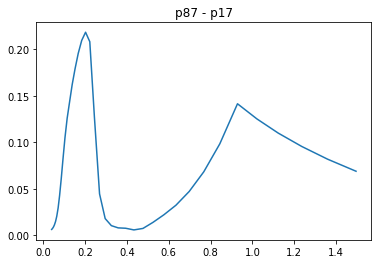

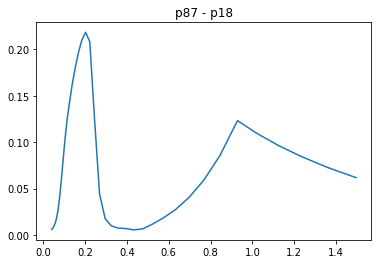

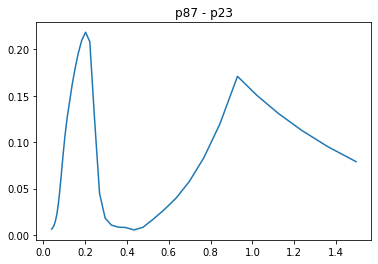

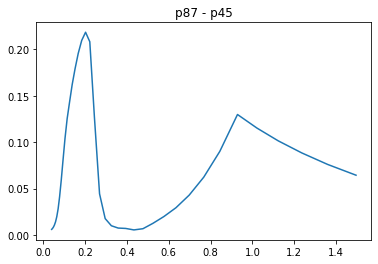

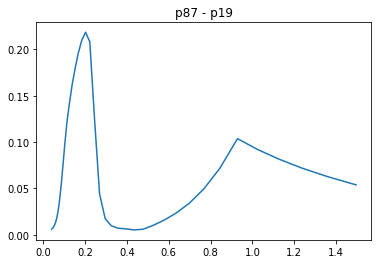

/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [56]:
xls = pd.ExcelFile(path_)
sheets = xls.sheet_names
boun = pd.read_excel(xls, boundary_sensor[11:], index_col=0)
for j in range(len(sheets)):
  if not sheets[j] == boundary_sensor[11:]:
    df = pd.read_excel(xls, sheets[j], index_col=0)
    subs = df.iloc[1:, 0:1]
    substaction = boun.iloc[1:, 1].values - df.iloc[1:, 1].values
    DF = pd.DataFrame(subs.values, columns=["Frequency"])
    DF["Substaction"] = substaction
    DF.to_excel(writer, sheet_name=boundary_sensor[11:] + " - " + sheets[j])
    plt.plot(subs.values, substaction)
    plt.title(boundary_sensor[11:] + " - " + sheets[j])
    plt.savefig(parent_dir + '/' + 'model_' + date + '/' + 'Results'+ '/' + 'SWAN_substaction_from_boundary_sensor' + '/' + boundary_sensor[11:] + " - " + sheets[j] + ".png")
    plt.show()
writer.save()

In [54]:
%cd SWAN_substaction_from_boundary_sensor/
%ls *xlsx

/gdrive/MyDrive/YL TEZ/py/swan_models/new_models/model_09260100/Results/SWAN_substaction_from_boundary_sensor
SWAN_09260100_substaction_p87.xlsx


In [55]:
#folder_nb += 1
#folder_nb